In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [6]:

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Define the target variable
y = housing['SalePrice']

# Select all features excluding the target variable
X = housing.drop('SalePrice', axis=1)

# Define a function for log transformation
def log_transform(x):
    return np.log1p(x)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    #('log_transform', FunctionTransformer(log_transform, validate=True)),
    ('scaler', StandardScaler()),
    #('poly', PolynomialFeatures(degree=2, include_bias=False)), 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [7]:
# Define the range of max_iter values to test
max_iter_values = [1000, 5000, 10000, 20000]

# Store cross-validation results
cv_results = []

# Loop over different max_iter values
for max_iter in max_iter_values:
    lasso_model = Lasso(max_iter=max_iter, alpha=10)
    
    # Create the final pipeline
    lasso_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', lasso_model)
    ])
    
    # Perform cross-validation
    lasso_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
    lasso_mean_score = lasso_scores.mean()
    cv_results.append((max_iter, lasso_mean_score))

# Display the cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["max_iter", "mean_r2_score"])
print(cv_results_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4115943404.503723, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5471109957.352539, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8499268840.87439, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent

   max_iter  mean_r2_score
0      1000       0.912253
1      5000       0.912268
2     10000       0.912268
3     20000       0.912268


In [8]:
# Define the Lasso model with increased iterations and set alpha to 10
from sklearn.linear_model import Ridge, Lasso

lasso_model = Lasso(max_iter=5000, alpha=10)



In [9]:
# Create the final pipeline

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_model)
])

In [10]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

lasso_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
lasso_mean_score = lasso_scores.mean()

print("Mean R^2 cross-validation score for Lasso:", lasso_mean_score)


Mean R^2 cross-validation score for Lasso: 0.9122683119876338


In [11]:
#use LassoCV
from sklearn.linear_model import LassoCV

# Define the LassoCV model
lasso_cv_model = LassoCV(cv=5, max_iter=5000)

# Create the final pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_cv_model)
])

# Perform cross-validation
lasso_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
lasso_mean_score = lasso_scores.mean()

print("Mean R^2 cross-validation score for LassoCV:", lasso_mean_score)

Mean R^2 cross-validation score for LassoCV: 0.913162393485754


In [12]:
#check the best alpha for LassoCV

# Fit the pipeline to the entire dataset
lasso_pipeline.fit(X, y)

# Extract the alpha value
best_alpha = lasso_cv_model.alpha_

print("Mean R^2 cross-validation score for LassoCV:", lasso_mean_score)
print("Best alpha value selected by LassoCV:", best_alpha)


Mean R^2 cross-validation score for LassoCV: 0.913162393485754
Best alpha value selected by LassoCV: 59.30068897867746


In [13]:
# Define the Ridge model
ridge_model = Ridge()

# Create the final pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_model)
])

# Perform cross-validation
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
ridge_mean_score = ridge_scores.mean()

print("Mean R^2 cross-validation score for Ridge:", ridge_mean_score)

Mean R^2 cross-validation score for Ridge: 0.9133295773863545


In [14]:
#use ridgeCV
from sklearn.linear_model import RidgeCV

# Define the LassoCV model
Ridge_cv_model = RidgeCV(cv=5)

# Create the final pipeline
Ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge_cv_model)
])

# Perform cross-validation
Ridge_scores = cross_val_score(Ridge_pipeline, X, y, cv=5, scoring='r2')
Ridge_mean_score = Ridge_scores.mean()

print("Mean R^2 cross-validation score for RidgeCV:", Ridge_mean_score)


Mean R^2 cross-validation score for RidgeCV: 0.9115027211501705


In [15]:

#check the best alpha for ridgeCV

# Fit the pipeline to the entire dataset
Ridge_pipeline.fit(X, y)

# Extract the alpha value
best_alpha = Ridge_cv_model.alpha_

print("Mean R^2 cross-validation score for RidgeCV:", lasso_mean_score)
print("Best alpha value selected by RidgeCV:", best_alpha)

Mean R^2 cross-validation score for RidgeCV: 0.913162393485754
Best alpha value selected by RidgeCV: 10.0


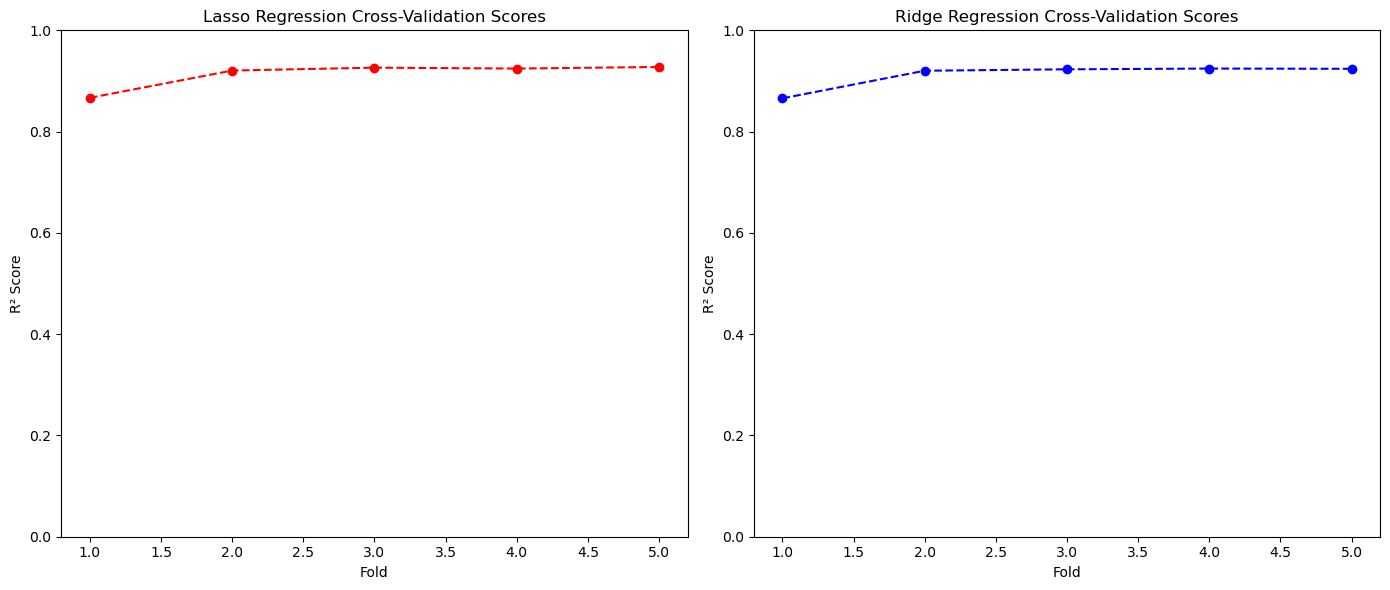

Mean R² cross-validation score for LassoCV: 0.913162393485754
Best alpha value selected by LassoCV: 59.30068897867746
Mean R² cross-validation score for RidgeCV: 0.9115027211501705
Best alpha value selected by RidgeCV: 10.0

Total number of features before Lasso regression: 312
Total number of features after Lasso regression: 136

Features before Lasso regression:
['PID', 'GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_A (agr)', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Stre

In [48]:


# Define the LassoCV model
lasso_cv_model = LassoCV(cv=5, max_iter=10000)



# Create the final pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_cv_model)
])

# Perform cross-validation for Lasso
lasso_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
lasso_mean_score = lasso_scores.mean()

# Fit the Lasso pipeline to the entire dataset
lasso_pipeline.fit(X, y)

# Extract the alpha value
best_lasso_alpha = lasso_cv_model.alpha_

# Define the RidgeCV model
ridge_cv_model = RidgeCV(cv=5)

# Create the final pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_cv_model)
])

# Perform cross-validation for Ridge
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
ridge_mean_score = ridge_scores.mean()

# Fit the Ridge pipeline to the entire dataset
ridge_pipeline.fit(X, y)

# Extract the alpha value
best_ridge_alpha = ridge_cv_model.alpha_

# Plotting the cross-validation scores
plt.figure(figsize=(14, 6))

# Lasso Scores
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), lasso_scores, marker='o', linestyle='--', color='r')
plt.title('Lasso Regression Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Ridge Scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), ridge_scores, marker='o', linestyle='--', color='b')
plt.title('Ridge Regression Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Print results
print("Mean R² cross-validation score for LassoCV:", lasso_mean_score)
print("Best alpha value selected by LassoCV:", best_lasso_alpha)
print("Mean R² cross-validation score for RidgeCV:", ridge_mean_score)
print("Best alpha value selected by RidgeCV:", best_ridge_alpha)

# Transform features using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Fit Lasso model directly on transformed features to get coefficients
lasso_cv_model.fit(X_transformed, y)

# Get the names of the transformed features
feature_names = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Get the coefficients from the Lasso model
lasso_coefficients = lasso_cv_model.coef_

# Get the non-zero coefficients
non_zero_coefficients = lasso_coefficients != 0

# Features before Lasso
features_before_lasso = feature_names

# Features after Lasso
features_after_lasso = np.array(features_before_lasso)[non_zero_coefficients]

# Calculate the total number of features before and after Lasso
total_features_before = len(features_before_lasso)
total_features_after = len(features_after_lasso)

print("\nTotal number of features before Lasso regression:", total_features_before)
print("Total number of features after Lasso regression:", total_features_after)

print("\nFeatures before Lasso regression:")
print(features_before_lasso)

print("\nFeatures after Lasso regression:")
print(features_after_lasso)

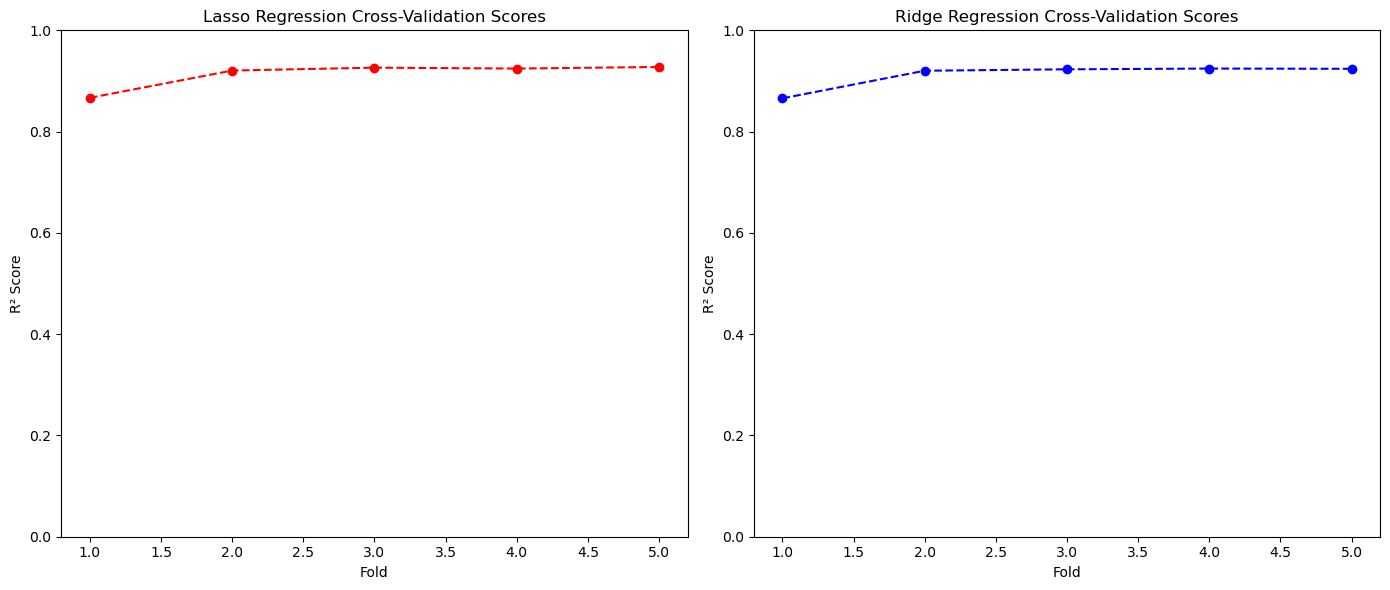

Mean R² cross-validation score for LassoCV: 0.913162393485754
Best alpha value selected by LassoCV: 59.30068897867746
RMSE for LassoCV: 19975.53584272706
Mean R² cross-validation score for RidgeCV: 0.9115027211501705
Best alpha value selected by RidgeCV: 10.0
RMSE for RidgeCV: 19683.01174790868


In [16]:
#add rmse
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the LassoCV model
lasso_cv_model = LassoCV(cv=5, max_iter=10000)

# Create the final pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_cv_model)
])

# Perform cross-validation for Lasso
lasso_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
lasso_mean_score = lasso_scores.mean()

# Fit the Lasso pipeline to the entire dataset
lasso_pipeline.fit(X, y)

# Extract the alpha value
best_lasso_alpha = lasso_cv_model.alpha_

# Predict using the Lasso pipeline
y_pred_lasso = lasso_pipeline.predict(X)

# Calculate RMSE for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))

# Define the RidgeCV model
ridge_cv_model = RidgeCV(cv=5)

# Create the final pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_cv_model)
])

# Perform cross-validation for Ridge
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
ridge_mean_score = ridge_scores.mean()

# Fit the Ridge pipeline to the entire dataset
ridge_pipeline.fit(X, y)

# Extract the alpha value
best_ridge_alpha = ridge_cv_model.alpha_

# Predict using the Ridge pipeline
y_pred_ridge = ridge_pipeline.predict(X)

# Calculate RMSE for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))

# Plotting the cross-validation scores
plt.figure(figsize=(14, 6))

# Lasso Scores
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), lasso_scores, marker='o', linestyle='--', color='r')
plt.title('Lasso Regression Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Ridge Scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), ridge_scores, marker='o', linestyle='--', color='b')
plt.title('Ridge Regression Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Print results
print("Mean R² cross-validation score for LassoCV:", lasso_mean_score)
print("Best alpha value selected by LassoCV:", best_lasso_alpha)
print("RMSE for LassoCV:", rmse_lasso)

print("Mean R² cross-validation score for RidgeCV:", ridge_mean_score)
print("Best alpha value selected by RidgeCV:", best_ridge_alpha)
print("RMSE for RidgeCV:", rmse_ridge)


In [25]:
# Fit Ridge model directly on transformed features to get coefficients
ridge_cv_model.fit(X_transformed, y)

# Get the coefficients from the Ridge model
ridge_coefficients = ridge_cv_model.coef_

# For Ridge, we will consider non-zero coefficients as those that are significantly non-zero (greater than a small threshold)
threshold = 1e-4
non_zero_coefficients_ridge = np.abs(ridge_coefficients) > threshold

# Features before Ridge
features_before_ridge = feature_names

# Features after Ridge
features_after_ridge = np.array(features_before_ridge)[non_zero_coefficients_ridge]

# Calculate the total number of features before and after Ridge
total_features_before_ridge = len(features_before_ridge)
total_features_after_ridge = len(features_after_ridge)

print("\nTotal number of features before Ridge regression:", total_features_before_ridge)
print("Total number of features after Ridge regression:", total_features_after_ridge)

print("\nFeatures before Ridge regression:")
print(features_before_ridge)

print("\nFeatures after Ridge regression:")
print(features_after_ridge)


Total number of features before Ridge regression: 312
Total number of features after Ridge regression: 312

Features before Ridge regression:
['PID', 'GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_A (agr)', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_missing', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_All

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131741617877.86383, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174618632935.5473, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166648076191.54343, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desc

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166674428941.51797, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179821125265.851, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173338163873.45645, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173353890602.76117, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140998495773.93015, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156216774870.42352, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_des

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44701763693.8053, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69492725068.85992, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122531713194.13702, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24447940313.464355, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23711467304.96649, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15530803882.410156, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desc

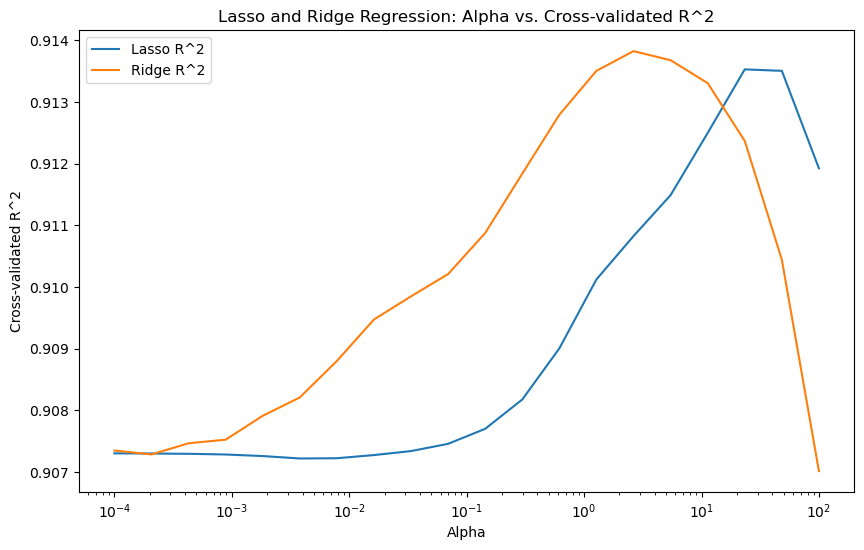

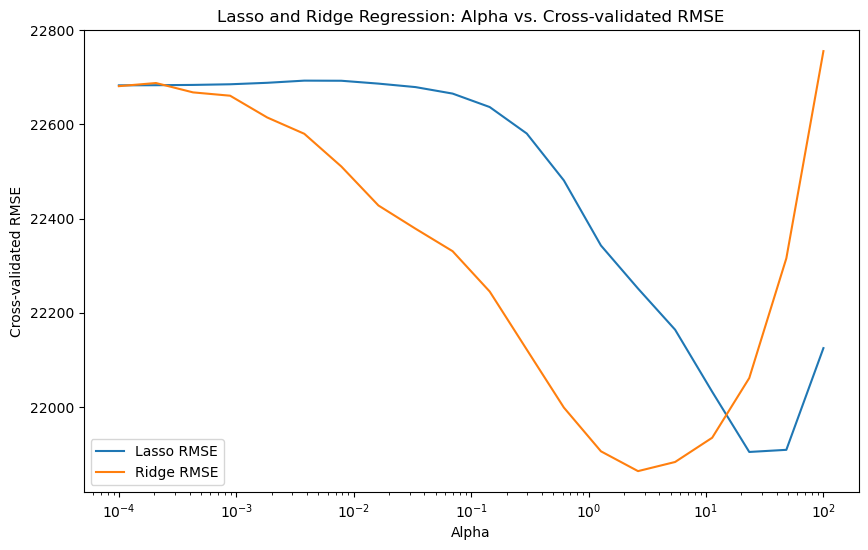

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Define the target variable
y = housing['SalePrice']

# Select all features excluding the target variable
X = housing.drop('SalePrice', axis=1)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the range of alpha values
alphas = np.logspace(-4, 2, 20)

# Initialize lists to store the cross-validated R^2 and RMSE scores
lasso_r2_scores = []
ridge_r2_scores = []
lasso_rmse_scores = []
ridge_rmse_scores = []

# Loop over the alpha values and calculate cross-validated R^2 and RMSE scores for Lasso and Ridge
for alpha in alphas:
    lasso = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Lasso(alpha=alpha, max_iter=10000))])
    ridge = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Ridge(alpha=alpha))])
    
    lasso_r2 = cross_val_score(lasso, X, y, cv=5, scoring='r2').mean()
    ridge_r2 = cross_val_score(ridge, X, y, cv=5, scoring='r2').mean()
    
    lasso_rmse = -cross_val_score(lasso, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
    ridge_rmse = -cross_val_score(ridge, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
    
    lasso_r2_scores.append(lasso_r2)
    ridge_r2_scores.append(ridge_r2)
    lasso_rmse_scores.append(lasso_rmse)
    ridge_rmse_scores.append(ridge_rmse)

# Convert the results to a DataFrame for easier plotting
results = pd.DataFrame({
    'alpha': alphas,
    'lasso_r2': lasso_r2_scores,
    'ridge_r2': ridge_r2_scores,
    'lasso_rmse': lasso_rmse_scores,
    'ridge_rmse': ridge_rmse_scores
})

# Plot the R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(results['alpha'], results['lasso_r2'], label='Lasso R^2')
plt.plot(results['alpha'], results['ridge_r2'], label='Ridge R^2')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated R^2')
plt.title('Lasso and Ridge Regression: Alpha vs. Cross-validated R^2')
plt.legend()
plt.show()

# Plot the RMSE scores
plt.figure(figsize=(10, 6))
plt.plot(results['alpha'], results['lasso_rmse'], label='Lasso RMSE')
plt.plot(results['alpha'], results['ridge_rmse'], label='Ridge RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated RMSE')
plt.title('Lasso and Ridge Regression: Alpha vs. Cross-validated RMSE')
plt.legend()
plt.show()
